<a href="https://colab.research.google.com/github/eckoecho/CodingDojo/blob/week-9/KMeans_Find_K_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This data source comes from https://github.com/Nikhil-Adithyan/Customer-Segmentation-with-K-Means



In [130]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

In [131]:
#Load Data
fpath="/content/drive/MyDrive/CodingDojo/03-AdvancedML/Week09/Data/cust_seg.csv"
df = pd.read_csv(fpath)
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [132]:
# df.drop(columns=["Customer Id", "Unnamed: 0"], inplace=True)
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [133]:
#Looking for missing values and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


In [134]:
#Finding which features have missing values
df.isna().sum()

Unnamed: 0           0
Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [135]:
#Creating different subsets of our data
cluster1 = df[["Age","Edu","Income"]]
cluster2 = df[["Years Employed", "Card Debt", "Other Debt"]]
cluster3 = df[["Defaulted", "DebtIncomeRatio"]]

In [137]:
#Instantiate Scaler
scaler = StandardScaler()
# Fit & transforming each cluster of our data
scaled_cluster1 = scaler.fit_transform(cluster1)
scaled_cluster2 = scaler.fit_transform(cluster2)
scaled_cluster3 = scaler.fit_transform(cluster3)

# Inertia vs. Clusters

In [139]:
def plot_kmeans(scaled_cluster):
    #Create an empty list of inertias
    inertias = []
    #Loop through k values between 2 and 10 and store the inertias in the list.
    for k in range(2,11):
        kmeans = KMeans(n_clusters=k, n_init="auto")
        kmeans.fit(scaled_cluster)
        # KMeans stores the inertia of the clustering as an attribute we can directly access after the model is fitted
        inertias.append(kmeans.inertia_)
    #Visualize Scores
    plt.plot(range(2,11), inertias, marker=".")
    plt.xlabel("clusters")
    plt.ylabel("inertia")

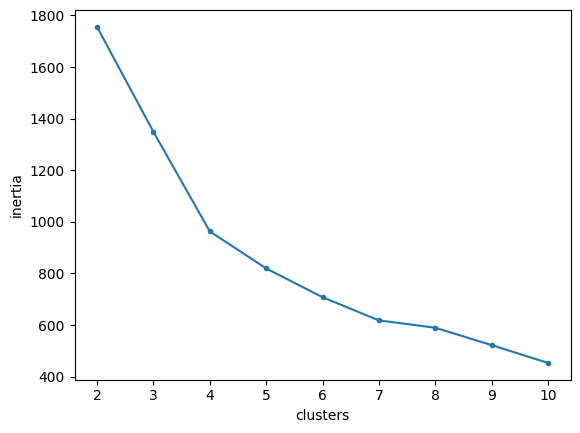

In [140]:
#Plotting scaled_cluster1 with custom function
plot_kmeans(scaled_cluster1)

The best clustering is a balance between the lowest number of clusters and the lowest inertia.



The best elbow is at 4 with an inertia score of 1400 for subset cluster1.

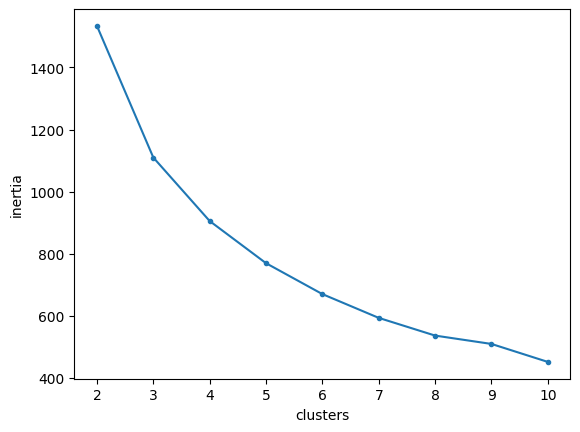

In [141]:
#Plotting cluster2 with custom function
plot_kmeans(scaled_cluster2)

Clearly the elbow is at 3 with a 1100 inertia score for Cluster 2.

In [148]:
#Instantiate Imputer for missing values in `defaulted column`
imputer = SimpleImputer(strategy="median")
imputer.fit(scaled_cluster3)
imputed_cluster3 = imputer.transform(scaled_cluster3)

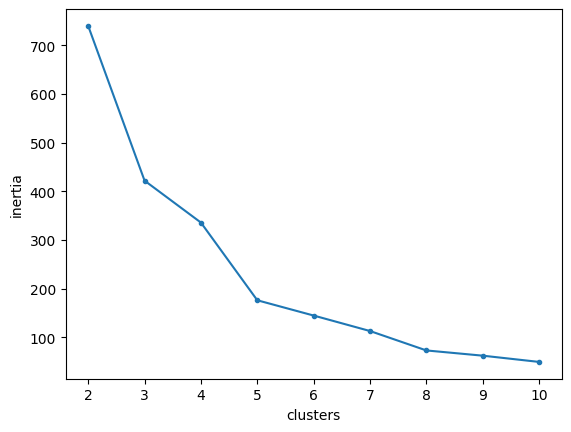

In [149]:
#Plotting cluster3 using custom kmeans function
plot_kmeans(imputed_cluster3)

The elbow is at 3 clusters with an inertia score of ~400 for subset cluster 3! The best out of this series!

# Silhouette Score

In [154]:
def plot_sil(scaled_cluster):
    # Visualize different silhouette scores
    # Save silhouette scores for various cluster numbers in list
    silhouette_scores = []
    for i in range(2, 11):
        kmeans = KMeans(n_clusters=i, n_init="auto")
        kmeans.fit(scaled_cluster)
        silhouette_scores.append(silhouette_score(scaled_cluster, kmeans.labels_))
    # Visualize scores
    plt.plot(range(2,11), silhouette_scores, marker=".")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score");

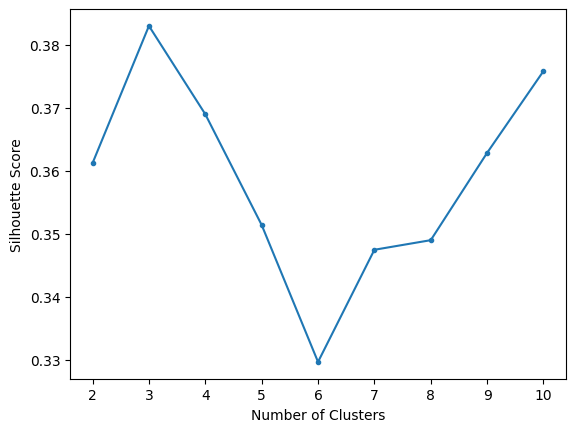

In [155]:
#Plotting Cluster 1 with custom Silhoutte Score function
plot_sil(scaled_cluster1)

The best score is 1 (signaling well-defined & well-separated clusters), and the worst is -1.

In Cluster1, our best cluster is 3 because it has the highest Silhouette Score of ~.38.

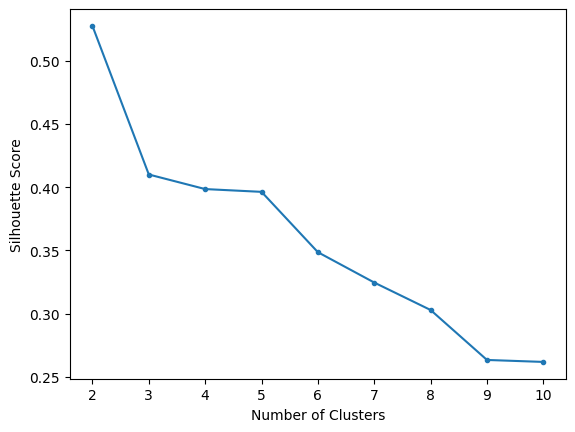

In [156]:
#Plotting Cluster 2 using custom Silhoutte Score function
plot_sil(scaled_cluster2)

Cluster 2's best Silhoutte Score is at 2 clusters with a Silhoutte Score of ~.50.

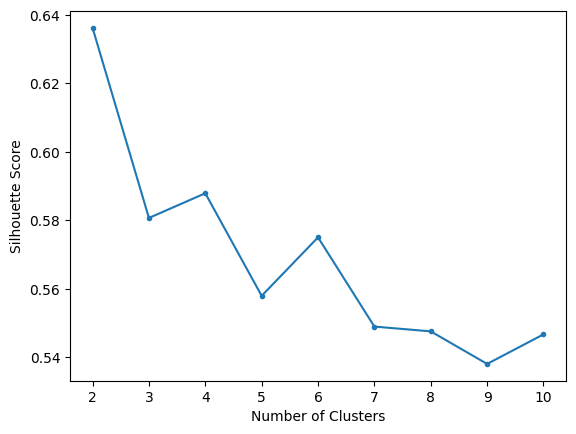

In [157]:
#Plotting an imputered Cluster via custom Silhoutte function
plot_sil(imputed_cluster3)

Cluster 3's best Silhoutte Score is at 2 clusters with ~.64.  Our highest score yet in this series!

## K set to 2 is the best choice because smaller number of clusters is more desirable than higher number of clusters.